In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [216]:
X1 = numpy.array(range(0, 10))
X2 = numpy.array(range(20, 30))
y1 = 1 + 1 * X1
y2 = (1 - (2 - 1)*15.) + 2 * X2

X = numpy.concatenate((X1, X2)).reshape(-1, 1)
y = numpy.concatenate((y1, y2)).reshape(-1, 1)

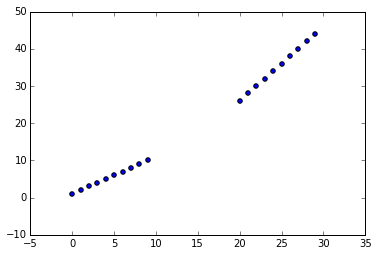

In [217]:
plt.scatter(X, y)
plt.show()

In [220]:
from numpy.linalg import inv

def linear_regression(X, y, weights=None, a=1):
    
    I_arr = numpy.ones((len(X), 1))
    X_arr = X
    Z_arr = X_arr**2
    X = numpy.concatenate((I_arr, X_arr, Z_arr), axis=1)
    
    X = numpy.matrix(X)
    Z = numpy.matrix(Z_arr)
    y = numpy.matrix(y)
    
    if weights != None:
        W = numpy.diag(weights.reshape((-1,)))
    else:
        E = numpy.eye(len(y))
        W = numpy.matrix(E)
                   
    k = inv(X.T * W * X) * (X.T * W * y)
    err = (y - X * k).T * W * (y - X * k)
    
    if numpy.abs(k[2, 0]) > a:
        
        X = numpy.concatenate((I_arr, X_arr), axis=1)
        X = numpy.matrix(X)
        
        k_p = inv(X.T * W * X) * (X.T * W * (y - Z * a))
        err_p = (y - X * k_p - Z * a).T * W * (y - X * k_p - Z * a)
        
        k_m = inv(X.T * W * X) * (X.T * W * (y + Z * a))
        err_m = (y - X * k_m + Z * a).T * W * (y - X * k_m + Z * a)
        
        if err_m < err_p:
            return numpy.array([k_m, k_m[0, 0], k_m[1, 0], -a])
        else:
            return numpy.array([k_p, k_p[0, 0], k_p[1, 0], a])
        
    else:
        return numpy.array([k, k[0, 0], k[1, 0], k[2, 0]])

In [223]:
k, k0, k1, k2 = linear_regression(X, y, weights=None, a=0.1)

In [224]:
numpy.array(k)

array([[ 1.3447155 ],
       [ 0.76332263],
       [ 0.0246063 ]])

In [208]:
def slope(X, k):
        
        slope = k[1,0] + 2. * k[2, 0] * X
        
        return slope
    
def predict(X, k):

        X = numpy.matrix(X)

        y = X * k

        return numpy.array(y)

In [213]:
s = slope(X, k)

In [214]:
s.mean()

1.4769053117783026

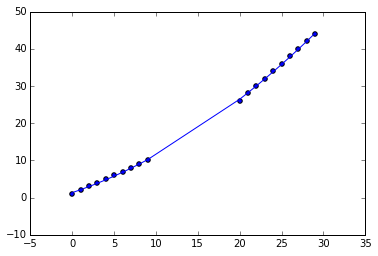

In [207]:
plt.scatter(X, y)
plt.plot(X, k0 + k1*X + k2*X**2)
plt.show()

In [188]:
k2

0.024606299212598517

In [123]:
X = numpy.matrix(X)

In [125]:
X * 100

matrix([[   0],
        [ 100],
        [ 200],
        [ 300],
        [ 400],
        [ 500],
        [ 600],
        [ 700],
        [ 800],
        [ 900],
        [2000],
        [2100],
        [2200],
        [2300],
        [2400],
        [2500],
        [2600],
        [2700],
        [2800],
        [2900]])